<a href="https://colab.research.google.com/github/AnshSharma16/Machine-learning-with-Python-Projects/blob/main/TitanicLogR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from google.colab import files
uploaded = files.upload()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('Titanic-Dataset.csv')
df.head()

Saving Titanic-Dataset.csv to Titanic-Dataset (4).csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [93]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [52]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [94]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Fare'] = scaler.fit_transform(df[['Fare']])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.375000,1,0,0.110460,2
1,1,1,0,0.682692,1,0,1.000000,0
2,1,3,0,0.451923,0,0,0.120745,2
3,1,1,0,0.625000,1,0,0.809027,2
4,0,3,1,0.625000,0,0,0.122649,2


In [101]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Instead of removing outliers, cap them at the bounds
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

columns_to_clean = [ 'Age' , 'Parch','Fare']
df = remove_outliers_iqr(df.copy(), columns_to_clean)
print(df)

     Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0           0       3    1  0.375000      1      0  0.110460         2
1           1       1    0  0.682692      1      0  1.000000         0
2           1       3    0  0.451923      0      0  0.120745         2
3           1       1    0  0.625000      1      0  0.809027         2
4           0       3    1  0.625000      0      0  0.122649         2
..        ...     ...  ...       ...    ...    ...       ...       ...
886         0       2    1  0.471154      0      0  0.198067         2
887         1       1    0  0.317308      0      0  0.457077         2
888         0       3    0  0.490385      1      0  0.357282         2
889         1       1    1  0.451923      0      0  0.457077         0
890         0       3    1  0.567308      0      0  0.118078         1

[891 rows x 8 columns]


In [102]:
x=df.drop('Survived', axis=1)
y=df['Survived']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(y_test)

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64


In [103]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1]


In [104]:
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



Accuracy: 0.7988826815642458
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Precision: 0.7638888888888888
Recall: 0.7432432432432432
F1 Score: 0.7534246575342465


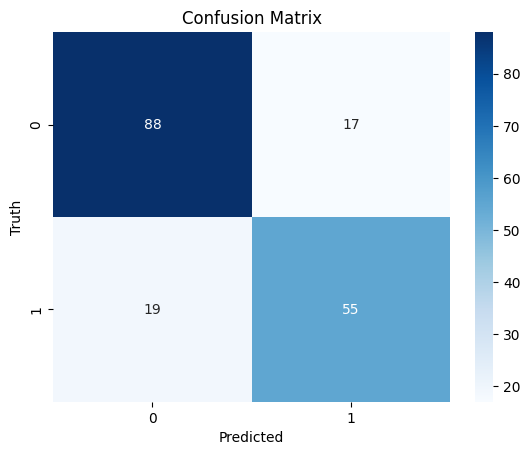

In [106]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
